<a href="https://colab.research.google.com/github/Netri-100224/CIFAR_DL/blob/main/Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install kaggle

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c cifar-10

 97% 696M/715M [00:06<00:00, 112MB/s]
100% 715M/715M [00:07<00:00, 106MB/s]


In [10]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [11]:
from zipfile import ZipFile
dataset='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [13]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.3 MB/s eta 0:00:00


In [14]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [15]:
import os
import numpy as np
import pandas as pd
from  PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [16]:
file=os.listdir('/content/train')#listing all data in list way in the given file


In [17]:
print(type(file))
len(file)

<class 'list'>


50000

In [18]:
print(file[0:5])#id of images are printed
print(file[-5:])

['28019.png', '6621.png', '32724.png', '22623.png', '36246.png']
['29632.png', '24371.png', '27403.png', '20404.png', '24069.png']


In [19]:
df=pd.read_csv('/content/trainLabels.csv')

In [20]:
df.shape

(50000, 2)

In [21]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [22]:
df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [23]:
# we can use onehot encoding but it will create various columns that will increase dimensionality of dataset


#so we are labelling manually
labels_dict={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
lab=[labels_dict[i] for i in df['label']]
print(lab[0:5])

[6, 9, 9, 4, 1]


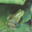

In [24]:
import cv2

from google.colab.patches import cv2_imshow # converts image into numpy array because imshow is not suitable in google colab so colam has created its own libraray
img=cv2.imread('/content/train/6621.png')
cv2_imshow(img)

In [25]:
df['id'].dtype

dtype('int64')

In [26]:
#Now we will read images in order as we know they are not stored in order

id_list=list(df['id'])

In [27]:
#convert images to numpy array

train_data_folder=('/content/train/')


data=[]

for id in id_list:
  image=Image.open(train_data_folder + str(id)+'.png')
  image=np.array(image)
  data.append(image)


In [28]:
type(data)

list

In [29]:
type(data[0]) #type of image

numpy.ndarray

In [30]:
data[0].shape  # shape of image if 3 is not included then the image is gray scaled

(32, 32, 3)

In [31]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
# getting x and y as dataset  and prediction label

x=np.array(data)
y=np.array(lab)

In [33]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [34]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [35]:
#Scaling of images pixels between 0 and 1
x_train_scale=x_train/255
x_test_scale=x_test/255

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes=10

#Setting layers of NN

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax') #Multiclass output=softmax,Binary Classification o/p=sigmoid usually
])

In [38]:
#compiling the NN

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',#if numerically encoded labels then use this,if one-hot encoded labels we use categorical cross entropy
metrics=['acc'])

In [39]:
model.fit(x_train_scale,y_train,validation_split=0.1,epochs=10)

#epoch is no of times our model will do forward propagation and backward propagation and update the weights .In each epoch 10 % of dataset data will be reserved as test/validation data


Epoch 1/10
1125/1125 [==============================] - 12s 5ms/step - loss: 1.9182 - acc: 0.2969 - val_loss: 1.7822 - val_acc: 0.3638
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7348 - acc: 0.3740 - val_loss: 1.7615 - val_acc: 0.3598
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.6523 - acc: 0.4075 - val_loss: 1.6584 - val_acc: 0.3938
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.5929 - acc: 0.4324 - val_loss: 1.6099 - val_acc: 0.4227
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.5496 - acc: 0.4436 - val_loss: 1.5705 - val_acc: 0.4320
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.5125 - acc: 0.4606 - val_loss: 1.5350 - val_acc: 0.4430
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.4834 - acc: 0.4679 - val_loss: 1.5454 - val_acc: 0.4482
Epoch 8/10
1125/1125 [==============================] - 4s 3m

###Above code's accuracy is very poor(approx 50%)

In [ ]:
# Thus we will do transfer learning

##**RESNET50**

In [40]:
from tensorflow.keras import Sequential,models,layers  #layers are stacked in sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [41]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

#imagenet is dataset on which model(resnet50) has derived some weights.
#include_top if false then we will have our own custom o/p layer else not(i.e.) same as resnet.
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [42]:
model=models.Sequential()#we can add layers or do as above model that we have trained
model.add(layers.UpSampling2D((2,2)))#image is scaled its height and width both becomes 2 times of original
model.add(layers.UpSampling2D((2,2)))#image is scaled its height and width both becomes 2 times of above line
model.add(layers.UpSampling2D((2,2)))#image is scaled its height and width both becomes 2 times of above line
model.add(convolutional_base)
model.add(layers.Flatten())#all matrices are of single dimension
model.add(layers.BatchNormalization())# All values are in same range
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))#to get rid of overfitting as will turn off some neurons(50%)
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))# get rid of overfitting as will turn off some neurons(50%)
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

#resnet is originally trained on images of size 256*256

In [45]:
 model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(lr=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

#lr=learning rate

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [46]:
history = model.fit(x_train_scale, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 475s 404ms/step - loss: 1.7130 - acc: 0.4383 - val_loss: 0.9033 - val_acc: 0.7730
Epoch 2/10
1125/1125 [==============================] - 454s 404ms/step - loss: 1.0238 - acc: 0.7007 - val_loss: 0.4740 - val_acc: 0.8865
Epoch 3/10
1125/1125 [==============================] - 447s 397ms/step - loss: 0.7418 - acc: 0.8094 - val_loss: 0.3759 - val_acc: 0.9100
Epoch 4/10
1125/1125 [==============================] - 454s 404ms/step - loss: 0.5650 - acc: 0.8701 - val_loss: 0.3158 - val_acc: 0.9170
Epoch 5/10
1125/1125 [==============================] - 447s 397ms/step - loss: 0.4372 - acc: 0.9125 - val_loss: 0.2763 - val_acc: 0.9305
Epoch 6/10
1125/1125 [==============================] - 447s 397ms/step - loss: 0.3451 - acc: 0.9374 - val_loss: 0.2533 - val_acc: 0.9345
Epoch 7/10
1125/1125 [==============================] - 447s 398ms/step - loss: 0.2707 - acc: 0.9551 - val_loss: 0.2448 - val_acc: 0.9308
Epoch 8/10
1125/1125 [============

In [47]:
loss,accuracy=model.evaluate(x_test_scale,y_test)
print('Test Accuracy',accuracy)

313/313 [==============================] - 39s 116ms/step - loss: 0.2242 - acc: 0.9417
Test Accuracy 0.9416999816894531


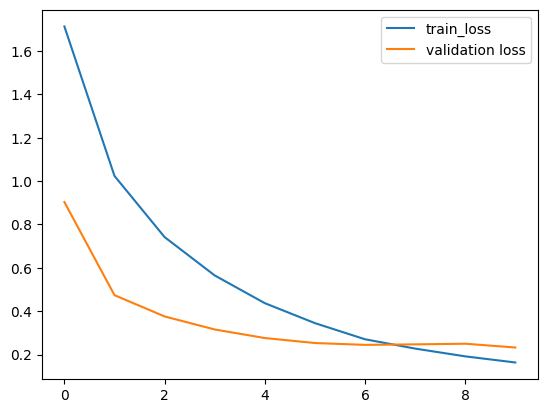

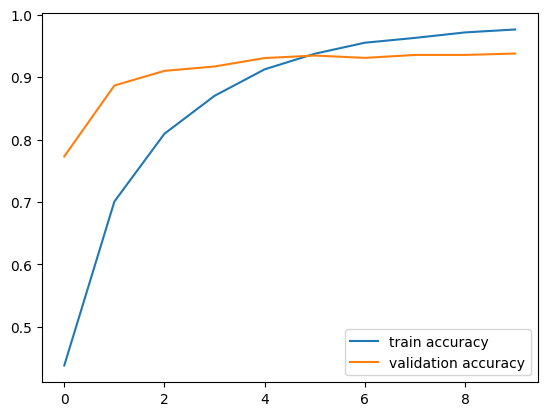

In [48]:
h=history

# plot the loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#Result:

###Accuracy on training data achieved is:97.62%
###Accuracy on test data achieved is :94.16%